In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/Семинар 5.csv', sep = ';')
data.head()

,n,y,x
0,1,310,390
1,2,350,385
2,3,330,545
3,4,425,680
4,5,502,810


In [ ]:
reg = LinearRegression().fit(data['x'].values.reshape(-1,1), data['y'].values.reshape(-1,1))

In [ ]:
epsilons = data['y'].values.reshape(-1,1) - reg.predict(data['x'].values.reshape(-1, 1))

In [ ]:
mean_e = epsilons.mean()
std_e = epsilons.std()

vec_w = (-1) * (epsilons - mean_e) / std_e
vec_w[:5]

array([[-0.37668623],
       [-1.46225638],
       [ 0.7806929 ],
       [-0.21206563],
       [-0.79457912]])

In [ ]:
vec_w = sorted(vec_w)

In [ ]:
import scipy.stats as scp

new_w = [round(scp.norm.cdf(vec_w[i])[0], 3) for i in range(len(vec_w))]
new_w

[0.072,
 0.127,
 0.129,
 0.156,
 0.185,
 0.21,
 0.213,
 0.246,
 0.247,
 0.351,
 0.353,
 0.38,
 0.389,
 0.416,
 0.561,
 0.588,
 0.693,
 0.783,
 0.816,
 0.865,
 0.878,
 0.897,
 0.937,
 0.995]

In [ ]:
i = np.linspace(0., 1., len(new_w))
k = 0

In [ ]:
for cur in range(len(new_w) - 1):
  k += (((new_w[cur] > i[cur]) & (new_w[cur] < i[cur + 1])) == 0)

k, len(new_w)

(17, 24)

# Задание 5.1

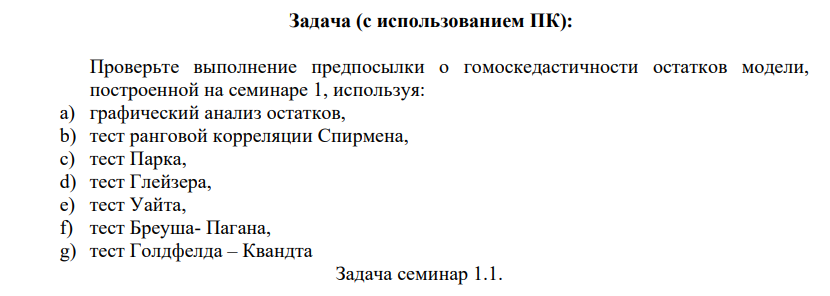

# Гетероскедастичность

# Графический анализ остатков

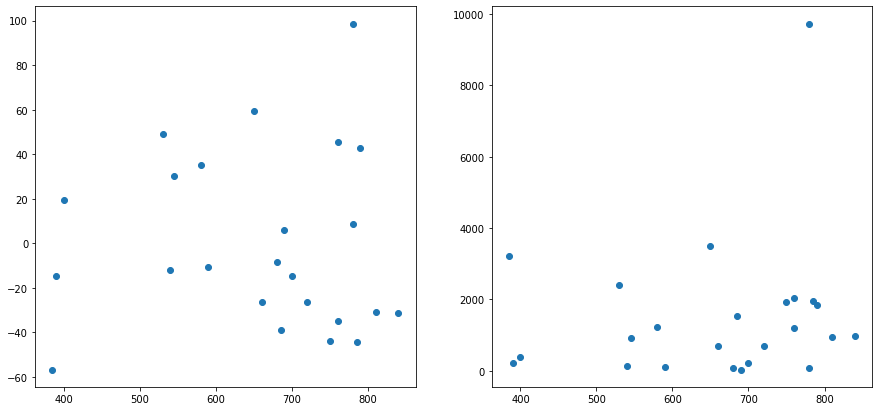

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))
ax1.scatter(y = -epsilons, x = data['x'].values)
ax2.scatter(y = epsilons ** 2, x = data['x'].values)
plt.show()

# тест ранговой корреляции Спирмена

In [ ]:
rho, p = scp.spearmanr(data['x'].values, abs(epsilons))

rho, p

(0.13701610691564495, 0.5231951496094867)

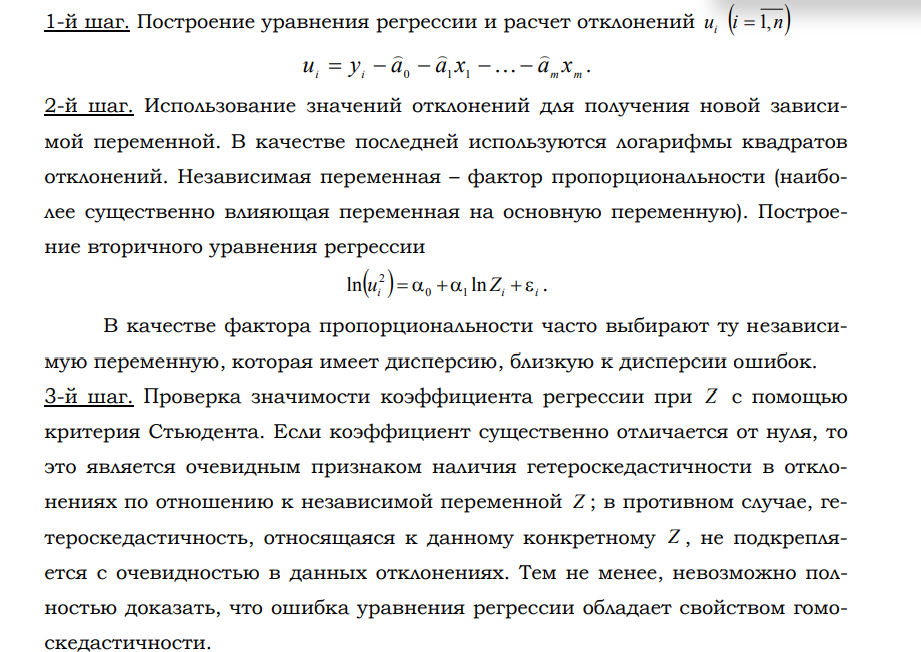

# тест Парка

In [ ]:
z = np.log(data['x'].values)

In [ ]:
import statsmodels.api as sm

results = sm.OLS.from_formula("np.log(epsilons ** 2) ~ np.log(x)", data = data).fit()

In [ ]:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     np.log(epsilons ** 2)   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                 -0.032
Method:                    Least Squares   F-statistic:                    0.2973
Date:                   Sat, 26 Nov 2022   Prob (F-statistic):              0.591
Time:                           11:07:41   Log-Likelihood:                -42.020
No. Observations:                     24   AIC:                             88.04
Df Residuals:                         22   BIC:                             90.40
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9529 

In [ ]:
t = scp.t.isf(0.05 / 2, 22)
t, 0.545

(2.073873067904015, 0.545)

t_tabl > t_fact, гипотеза H0 принимается(т-теста) -> параметр не значим -> гипотеза Н0 принимается -> гетероскедастичность отсутствует

# тест Глейзера

In [ ]:

result = [0, 1, 2, 3, 4, 5]
model = ['x', 'np.sqrt(x)', 'np.abs(1/x)', 'np.abs(1 / np.sqrt(x))', 'np.sqrt(x ** 3)']

result[1] = sm.OLS.from_formula("np.abs(epsilons) ~ x", data = data).fit().tvalues['x']
result[2] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x)", data = data).fit().tvalues['np.sqrt(x)']
result[3] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1/x)", data = data).fit().tvalues['np.abs(1 / x)']
result[4] = sm.OLS.from_formula("np.abs(epsilons) ~ np.abs(1 / np.sqrt(x))", data = data).fit().tvalues['np.abs(1 / np.sqrt(x))']
result[5] = sm.OLS.from_formula("np.abs(epsilons) ~ np.sqrt(x ** 3)", data = data).fit().tvalues['np.sqrt(x ** 3)']


In [ ]:
for i in range(5):
  print(f'Model {model[i]} t-stats : {result[i + 1]}')

Model x t-stats : 0.7935388284900962
Model np.sqrt(x) t-stats : 0.7432130602685529
Model np.abs(1/x) t-stats : -0.5824717762405766
Model np.abs(1 / np.sqrt(x)) t-stats : -0.6365793767746863
Model np.sqrt(x ** 3) t-stats : 0.840605983252266


все t-значения меньше табличного => гипотеза Н0 принимается и присутствует гомоскедастичность 

In [ ]:
new_x = np.concatenate((np.ones((len(data['y']), 1)), data['x'].values.reshape(-1, 1)), axis = 1)
new_x

array([[  1., 390.],
       [  1., 385.],
       [  1., 545.],
       [  1., 680.],
       [  1., 810.],
       [  1., 780.],
       [  1., 790.],
       [  1., 785.],
       [  1., 400.],
       [  1., 530.],
       [  1., 580.],
       [  1., 720.],
       [  1., 700.],
       [  1., 690.],
       [  1., 650.],
       [  1., 760.],
       [  1., 780.],
       [  1., 840.],
       [  1., 590.],
       [  1., 540.],
       [  1., 660.],
       [  1., 685.],
       [  1., 750.],
       [  1., 760.]])

#Тест Голфреда-Кванта

In [ ]:
from statsmodels.stats import api
api.het_goldfeldquandt(epsilons, new_x)

(0.5174470920501953, 0.8431082250887834, 'increasing')

#Тест Уайта

тест работает и используется в дальнейших работах

In [1]:
import statsmodels.api as sm
fin_model = sm.OLS.from_formula("y ~ x", data = data)

NameError: ignored

In [ ]:
from statsmodels.stats.diagnostic import het_white

#perform White's test
white_test = het_white(fin_model.fit().resid, fin_model.fit().model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test))['Test Statistic p-value'])